# Titanic Survival Dataset 

- We have already divided the dataset into train and test, we will train the model with train data and predict on test data

Things to do with the dataset:-
- Exploratory Data Analysis (EDA)
  - Data Cleaning
  - Variable Transformations
  - Plots to study trends
- Feature engineering and Variable Selection
- Model Building and Validation
    - Preprocessing
    - Model Building, testing and validation
    - Model selection
- Final results

## Importing required library

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Gettting the data through pandas

In [35]:
train_t=pd.read_excel('Titanic_Survival_Train.xls', index_col=0, header=0)
test_t = pd.read_excel('Titanic_Survival_Test.xls', index_col=0, header=0)
test_t.head(5)
# train_t.set_index('PassengerId').head()
# to set the passenger id as index

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


In [36]:
# TO display Max column
pd.set_option('Display.max_columns',None)
pd.get_option('display.max_rows',None)

60

In [37]:
train_t.info() # it returns the data types and count of not null values.
train_t.shape #  gives the number of rows and columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


(891, 11)

In [38]:
train_t.describe()
# Note: If min and 25% values are not close to each other then there are missing values
#       same for 75% and max .
train_t.Embarked.describe()
# It show highest port of embarktion which is southampton(S)

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [39]:
train_t.dtypes # Gives the data types

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

## EDA
### Tabulation

In [40]:
# Mode() gives the highest value
train_t.Pclass.mode()
# Maximum people travlling were of 3rd class

0    3
dtype: int64

In [41]:
train_t.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [42]:
pd.crosstab(train_t['Sex'], train_t['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


## Data Visualization 

### 1:Boxplot 

-Tell you the values of your outliers<br>
-Identify if data is symmetrical<br>
-Determine how tightly data is grouped<br>
-See if your data is skewed<br>

'The count of people between the age of 20 to 36 is more,\n    and there are also some outliers'

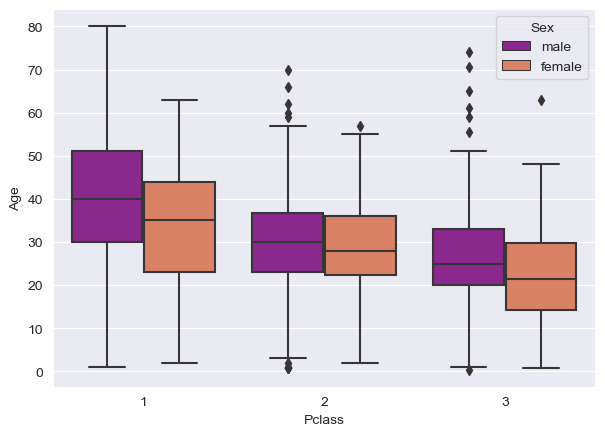

In [43]:
# Using Seaborn
plt.figure(figsize=(7,5), dpi=100)
sns.set_style('darkgrid')
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train_t, palette='plasma')

# Box plot for single variable
#train_t.boxplot('Age')
'''The count of people between the age of 20 to 36 is more,
    and there are also some outliers'''

### 2:Countplot

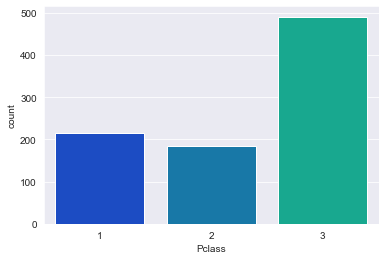

In [44]:
'''
Colormap Possible values are: 
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd,
OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r,
PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, , Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu,
RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r,
Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r,
binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, 
copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r,
gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, 
gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, 
magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, 
rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, 
tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, 
twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
'''

# To display the count of embarked graphically where (C)=Cherbourg; (Q)=Queenstown; (S)=Southampton
sns.countplot(x='Pclass', data=train_t, palette='winter')

### 3: Pie plot

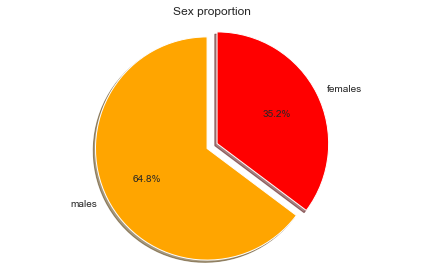

In [45]:
# One line simple Pie plot
#train_t.Sex.value_counts().plot(kind='pie')

# Custom designed pie chart
# sum the instances of males and females
males=(train_t['Sex'] == 'male').sum()
females=(train_t['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create pie chart
plt.pie(
    proportions,
    labels=['males','females'],
    shadow=True,
    colors=['orange','red'],
    explode=(0.10, 0),
    startangle = 90,
    autopct = '%1.1f%%'
)
plt.axis('equal')
plt.title('Sex proportion')
plt.tight_layout()
plt.show()

### 4: Histogram

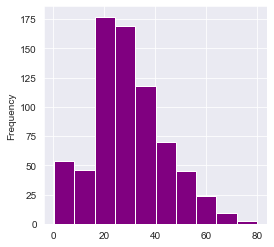

In [46]:
# Normal histogram
train_t['Age'].plot.hist(figsize=(4,4), color='purple')

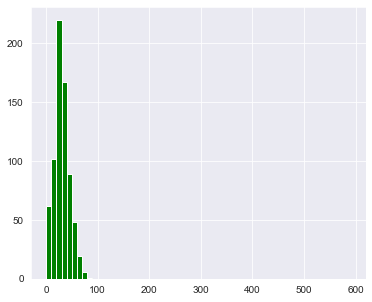

In [47]:
# Custom histogram
# create a dataframe with a single variable 
df=train_t.Age.sort_values()
df
# Manually entering bins values
binsV= np.arange(0,600,10)
binsV
# plot histogram
plt.figure(figsize=(6,5))
plt.hist(df,bins=binsV, color='green')
plt.show()



### 6: Facet Grid

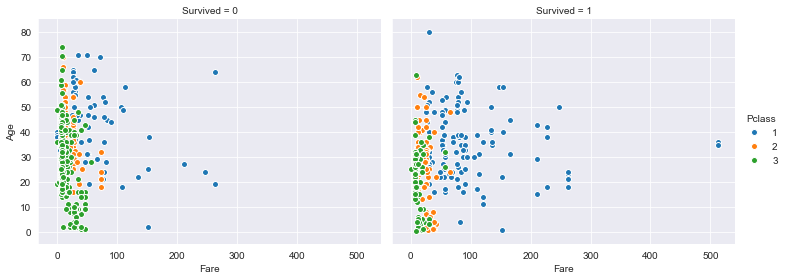

In [48]:
titc=sns.FacetGrid(train_t,col='Survived',hue='Pclass',height=4, aspect=1.3)
titc.map(plt.scatter,'Fare','Age',edgecolor='w')
titc.add_legend()

### Data Wranging

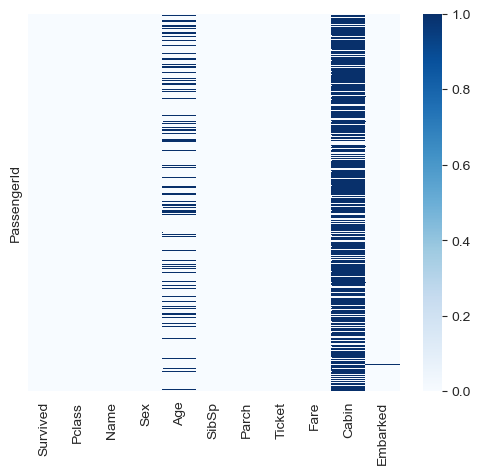

In [49]:
# visualizing null values with heatmap
fig3=plt.figure(figsize=(6,5), dpi=100)
#fig3, ax_1 = plt.subplots(figsize=(8,5), nrows=1, ncols=2)

sns.heatmap(train_t.isnull(), yticklabels=False, cmap='Blues')
#sns.heatmap(test_t.isnull(), yticklabels=False, cmap='viridis')

#### Imputing missing values

In [50]:
# Checking the percentage of null values
train_t.isnull().sum()*100/len(train_t)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

### Dropping the columns with more the 70% of missing values

In [51]:
#half_count=len(titanic)/2

# Train data
half_count= 0.75*len(train_t)
train_t=train_t.dropna(thresh=half_count,axis=1)
print(train_t.isnull().sum())

'''
We can separatly drop the column
titanic.drop('Cabin',axis=1, inplace=True)
'''

# Test data
half_count= 0.75*len(test_t)
test_t=test_t.dropna(thresh=half_count,axis=1)
print(test_t.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64
Survived    0
Pclass      0
Name        0
Sex         0
Age         2
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


In [52]:
# Dropping unwanted variables
train_t.drop(['Ticket','Fare'], axis=1, inplace=True)
test_t.drop(['Ticket','Fare'], axis=1, inplace=True)

In [53]:
# Train data
# Imputing Age variable with mean()
train_t['Age'].fillna(int(train_t['Age'].mean()), inplace=True)

# Imputing Embarked column with mode()
train_t['Embarked'].fillna(train_t['Embarked'].mode()[0],inplace=True)

# Test data
test_t['Age'].fillna(int(test_t['Age'].mean()), inplace=True)

In [54]:
# Dropping the leftover null values
train_t.dropna(inplace=True)
test_t.dropna(inplace=True)

In [55]:
#train_t.isnull().sum()
test_t.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [56]:
# Manually changing categorical variable to a numeric type
train_t.Sex = train_t.Sex.map({'male': 1, 'female': 0})
test_t.Sex = test_t.Sex.map({'male': 1, 'female': 0})

In [57]:
# Categorizing the age column to see the count of kids, adults, senior
passenger_df = train_t['Age']
bins=[0,15,21,50,passenger_df.max()]
binlabels=['Children','Adolescents','Adult','Senior']
Categories = pd.cut(passenger_df, bins, labels=binlabels)
Categories.value_counts()

Adult          623
Adolescents    121
Children        83
Senior          64
Name: Age, dtype: int64

In [58]:
# Converting categorical data to numeric using LabelEncoder()

# Train data
from sklearn import preprocessing

column = ['Embarked']
le = preprocessing.LabelEncoder()

for x in column:
    train_t[x]=le.fit_transform(train_t[x])

In [59]:
# For test data
column = ['Embarked']
le = preprocessing.LabelEncoder()
for x in column:
    test_t[x]=le.fit_transform(test_t[x])

In [60]:
# Feature selection
train_t = train_t[['Name','Sex','Age','Pclass','Survived']]
train_t.head()

test_t = test_t[['Name','Sex','Age','Pclass','Survived']]
test_t.head()

,Name,Sex,Age,Pclass,Survived
PassengerId,,,,,
871,"Balkic, Mr. Cerin",1,26.0,3,0
872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1
873,"Carlsson, Mr. Frans Olof",1,33.0,1,0
874,"Vander Cruyssen, Mr. Victor",1,47.0,3,0
875,"Abelson, Mrs. Samuel (Hannah Wizosky)",0,28.0,2,1


### Model Creation And Implemetation

#### Manually splitting train , test

In [61]:
# We can also Manually Divide x and y into train and test
X_train=train_t.values[:,1:-1]
Y_train=train_t.values[:,-1]
Y_train = Y_train.astype(int)

X_test=test_t.values[:,1:-1]
Y_test=test_t.values[:,-1]
Y_test=Y_test.astype(int)

In [62]:
# Scaler is used to eliminate the difference between train and test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,Y_train)
pred = log.predict(X_test)
print(list(zip(Y_test,pred)))

[(0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0)]


In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))
print('Accuracy of Logistic model is:',accuracy_score(Y_test, pred))

[[12  2]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88         7

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21

Accuracy of Logistic model is: 0.9047619047619048


## K-Nearest Neighbors

KNN  It is an unsupervised algorithm and also known as lazy learning algorithm. It works by calculating the distance of 1 test observation
from all the observation of the training dataset and then finding K nearest neighbors of it. This happens for each and every test observation and that is how it finds similarities in the data. For calculating distances KNN uses a distance metric from the list of available metrics.

In [65]:
# Predicting using KNeighbors_classifier
from sklearn.neighbors import KNeighborsClassifier

# Creating a model object
knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')

# Fitting the model on the data
knn.fit(X_train, Y_train)

# Predicting the values
y_pred = knn.predict(X_test)
print(list(zip(Y_test, y_pred)))

[(0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0)]


In [66]:
cfm = confusion_matrix(Y_test,y_pred)
print(cfm)

print('Classification report:')
print(classification_report(Y_test,y_pred))

acc = accuracy_score(Y_test,y_pred)
print('Accuracy of the model: ',acc)

[[13  1]
 [ 0  7]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93         7

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21

Accuracy of the model:  0.9523809523809523


In [67]:
# We can check the perfect value of K

from sklearn.metrics import accuracy_score

for K in range(1,16):
    model_knn = KNeighborsClassifier(K,metric='euclidean')
    model_knn.fit(X_train,Y_train)
    y_pred = model_knn.predict(X_test)
    print('Accuracy is: ', accuracy_score(Y_test,y_pred), 'for K-Value: ',K)

Accuracy is:  0.8571428571428571 for K-Value:  1
Accuracy is:  1.0 for K-Value:  2
Accuracy is:  0.9523809523809523 for K-Value:  3
Accuracy is:  1.0 for K-Value:  4
Accuracy is:  0.8571428571428571 for K-Value:  5
Accuracy is:  0.9523809523809523 for K-Value:  6
Accuracy is:  0.9047619047619048 for K-Value:  7
Accuracy is:  0.9047619047619048 for K-Value:  8
Accuracy is:  0.8571428571428571 for K-Value:  9
Accuracy is:  0.9523809523809523 for K-Value:  10
Accuracy is:  0.9047619047619048 for K-Value:  11
Accuracy is:  0.9523809523809523 for K-Value:  12
Accuracy is:  0.9047619047619048 for K-Value:  13
Accuracy is:  0.9523809523809523 for K-Value:  14
Accuracy is:  0.9047619047619048 for K-Value:  15


In [68]:
model_knn = KNeighborsClassifier(n_neighbors = 2,metric='euclidean')
model_knn.fit(X_train,Y_train)
y_pred = model_knn.predict(X_test)
print('Accuracy is: ', accuracy_score(Y_test,y_pred), 'for K-Value: ')

Accuracy is:  1.0 for K-Value: 
